In [1]:
from data import Dataprep
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.utils.data import TensorDataset, Subset, ConcatDataset
import time
import random
import numpy as np

(100, 2)
(900, 2)


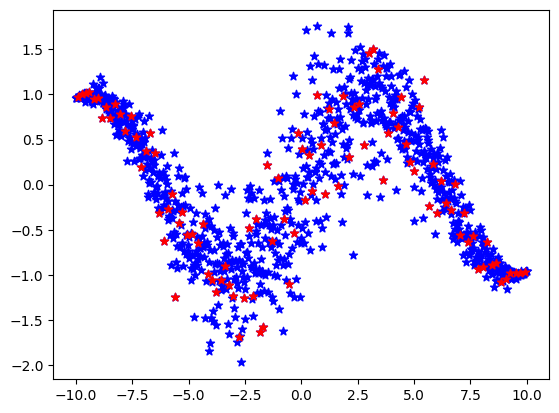

In [2]:
dataset_size = 1000
initial_samplesize = 100

data = Dataprep(-10, 10, dataset_size, initial_samplesize) # Load the data
known_data, pool_data = data.known_data, data.pool_data # Save the train and test loaders

In [3]:
validation_size = 0.1
verbose = False
epochs = 5

def train_model():
    # Use random 10% of data for validation
    train_size = int((1 - validation_size) * len(known_data))
    val_size = len(known_data) - train_size
    train_dataset, val_dataset = random_split(known_data, [train_size, val_size])
    print("Length of train, val, and pool dataset", len(train_dataset), len(val_dataset), len(pool_data))

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

    for epoch in range(epochs):
        if verbose:
            start_epoch = time.time()
            print('Epoch: {} of {}, time-taken: {:.2f} seconds'.format(epoch+1, epochs, time.time() - start_epoch))
    
    return pool_data

def select_samples(pool_data, n):
    selected_indices = random.sample(range(len(pool_data)), n)
    print(selected_indices)
    #pool_samples = [pool_dataset[i][:] for i in selected_indices]
    #print(pool_samples)
    return selected_indices
        
        # self.known_dataset.extend(random_samples)

In [4]:
selected_indices = random.sample(range(len(data.pool_data)), 10)
selected_indices

[863, 144, 779, 842, 729, 580, 444, 392, 126, 593]

In [5]:
print(data.known_data.shape)
print(data.pool_data.shape)

(100, 2)
(900, 2)


In [12]:
know_data, pool_data = data.next_sample(selected_indices)
#know_data, pool_data = data.known_data, data.pool_data
print(data.known_data.shape)
print(data.pool_data.shape)

(130, 2)
(870, 2)


In [13]:
known_data.shape

(100, 2)

In [16]:
ds, dl = data.load_data(data.known_data)
len(ds.tensors)

2

In [9]:
pool_df

,0,1
0,0.510511,0.314759
1,7.597598,-0.872701
2,-4.694695,-0.574355
3,2.812813,0.594093
4,-7.437437,0.643612
...,...,...
885,-0.570571,-0.970905
886,-2.172172,0.007767
887,-2.652653,-1.083239
888,-2.352352,-0.664672


In [11]:
change

,0,1
0,-4.094094,-1.163369
1,2.872873,0.341411
2,-4.614615,-1.138598
3,0.570571,0.476627
4,-1.651652,-1.143904
5,6.896897,-0.030243
6,-2.852853,-1.350767
7,-3.053053,-1.501971
8,8.718719,-1.010322
9,-3.973974,-0.895709


In [14]:
np.array_equal(np.array(selected_df.tail(10)), np.array(change))

True

In [8]:
data.pool_data.shape

(1790,)

In [28]:
data.x_selected.shape

(110,)

In [12]:
pool_df.head(10)

,x,y
0,6.916917,-0.526448
1,-5.195195,-0.623636
2,3.313313,0.483551
3,-0.570571,-0.554052
4,0.010010,1.372928
5,1.531532,0.189458
6,1.651652,0.117998
7,9.039039,-0.986414
8,1.251251,0.327997
9,-2.752753,-0.765041


In [13]:
selected_df.tail(10)

,x,y
100,-9.959960,0.965201
101,5.795796,-0.043358
102,-1.691692,-1.567732
103,7.517518,-0.560293
104,9.619620,-0.997390
105,-2.992993,-1.140564
106,-7.117117,0.249315
107,-0.230230,0.174644
108,4.934935,0.664879
109,5.975976,-0.494687


In [14]:
change

,x,y
0,-9.959960,0.965201
1,5.795796,-0.043358
2,-1.691692,-1.567732
3,7.517518,-0.560293
4,9.619620,-0.997390
5,-2.992993,-1.140564
6,-7.117117,0.249315
7,-0.230230,0.174644
8,4.934935,0.664879
9,5.975976,-0.494687


In [20]:
np.array_equal(np.array(selected_df.tail(10)), np.array(change))

True

In [ ]:
print(data.x_selected.shape)
print(data.y_selected.shape)
print(data.x_pool.shape)

(100,)
(100,)
(900,)


In [98]:
pool_dataset_n = np.array(pool_dataset).squeeze()
ds_n = pool_dataset_n[selected_samples]
print(len(pool_dataset_n))
print(ds_n)
pool_dataset_n = np.delete(pool_dataset_n, selected_samples, axis=0)
print(len(pool_dataset_n), len(ds_n))

900
[[ 9.9399395e+00 -9.6709800e-01]
 [ 4.3043044e-01  6.1973608e-01]
 [-2.0320320e+00 -9.3126416e-01]
 [ 6.1061060e-01  7.4274065e-03]
 [-2.5925925e+00 -9.2927104e-01]
 [-3.4334335e+00 -7.8761590e-01]
 [ 6.4764767e+00 -2.5183225e-01]
 [ 6.7567568e+00 -7.4787784e-01]
 [-1.9519520e+00 -2.9226610e-01]
 [ 3.5335336e+00  1.3557800e+00]]
890 10


In [105]:
ds_t = pool_dataset[selected_samples]
print(len(pool_dataset))
indices_to_keep = [idx for idx in range(len(pool_dataset)) if idx not in selected_samples]
pool_dataset_t = Subset(pool_dataset, indices_to_keep)
print(ds_t)
print(len(pool_dataset_t), len(ds_t[0]))

900
(tensor([[ 9.9399],
        [ 0.4304],
        [-2.0320],
        [ 0.6106],
        [-2.5926],
        [-3.4334],
        [ 6.4765],
        [ 6.7568],
        [-1.9520],
        [ 3.5335]]), tensor([[-0.9671],
        [ 0.6197],
        [-0.9313],
        [ 0.0074],
        [-0.9293],
        [-0.7876],
        [-0.2518],
        [-0.7479],
        [-0.2923],
        [ 1.3558]]))
890 10


In [132]:
type(torch.Dataset(ds_t[0]))

NameError: name 'torch' is not defined

In [112]:
np.array_equal(np.array(pool_dataset_t).squeeze(), pool_dataset_n)

True

In [116]:
print(len(known_dataset))
print(len(ConcatDataset([known_dataset, ds_t])))

100
102


In [129]:
len(ds_t.tensors)

AttributeError: 'tuple' object has no attribute 'tensors'

In [124]:
len(known_dataset.tensors)

2

In [127]:
len(known_dataset.tensors[:])

2

In [121]:
len(known_dataset[:][0]), len(known_dataset[0]) 

(100, 2)

In [122]:
known_dataset[:][0][0].shape

torch.Size([1])

In [1]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Example data
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# K-Medoids clustering
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)

# Cluster centers (medoids)
print("Medoids:", kmedoids.cluster_centers_)

# Labels
print("Labels:", kmedoids.labels_)

ModuleNotFoundError: No module named 'sklearn_extra'